In [185]:
# Sustainability Analysis: Vanilla Production & Environmental Impact

# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
# Display settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [189]:
# --- Set Working Directory to Downloads ---
import os
current_dir = os.getcwd()
print(current_dir)
%cd C:\Users\krist\OneDrive\Desktop

C:\Users\krist\OneDrive\Desktop
C:\Users\krist\OneDrive\Desktop


In [191]:
# --- Data Loading ---
# Load vanilla production data from FAOSTAT 
faostat_file = "Production_data_vanilla.csv"
production_df = pd.read_csv(faostat_file, encoding='latin1')

In [193]:
# Filter for Madagascar, Vanilla filtered through download from Faostat database
vanilla_df = production_df[(production_df['Area'] == 'Madagascar')].copy()

In [195]:
# Preview data
print("Vanilla Production Data:")
print(vanilla_df.head())

Vanilla Production Data:
    ï»¿Domain Code                            Domain  Area Code (M49)  \
646             QV  Value of Agricultural Production              450   
647             QV  Value of Agricultural Production              450   
648             QV  Value of Agricultural Production              450   
649             QV  Value of Agricultural Production              450   
650             QV  Value of Agricultural Production              450   

           Area  Element Code  \
646  Madagascar           152   
647  Madagascar           152   
648  Madagascar           152   
649  Madagascar           152   
650  Madagascar           152   

                                               Element  Item Code (CPC)  \
646  Gross Production Value (constant 2014-2016 tho...             1658   
647  Gross Production Value (constant 2014-2016 tho...             1658   
648  Gross Production Value (constant 2014-2016 tho...             1658   
649  Gross Production Value (constant

In [197]:
# --- Carbon Emissions Data ---
# CarbonCloud CO2 emissions per kg vanilla (static value from report)
carbon_footprint_per_kg = 66.37  # kg CO₂e per kg vanilla


In [199]:
# Add emissions column
vanilla_df['Emissions_kg_CO2e'] = vanilla_df['Value'] * carbon_footprint_per_kg

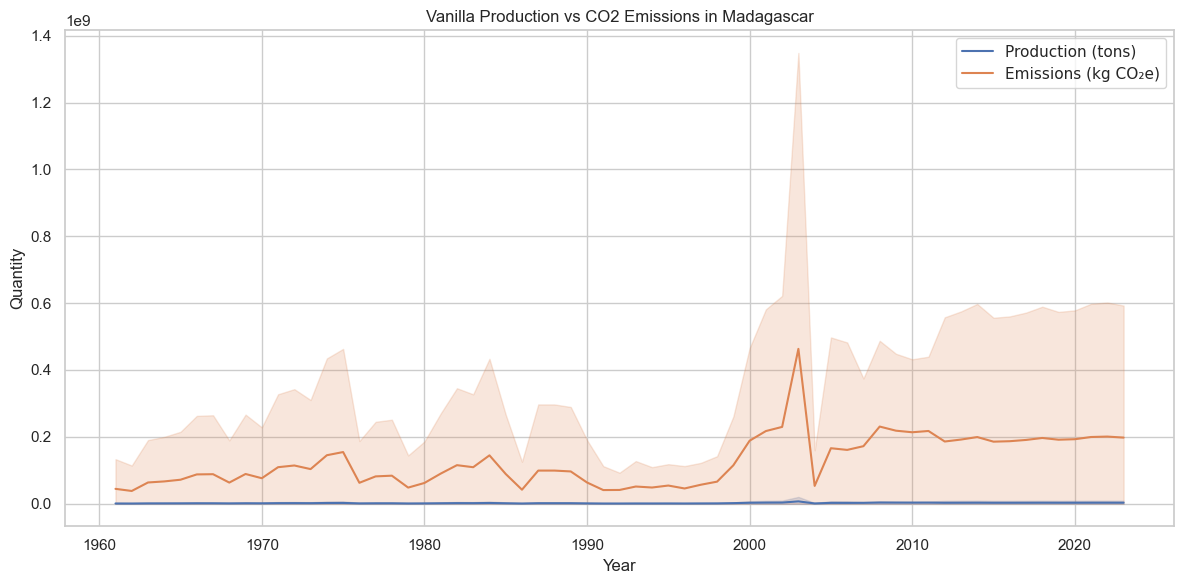

In [201]:
# --- Visualization: Production vs Emissions ---
vanilla_df['Year'] = vanilla_df['Year'].astype(int)
sns.lineplot(data=vanilla_df, x='Year', y='Value', label='Production (tons)')
sns.lineplot(data=vanilla_df, x='Year', y='Emissions_kg_CO2e', label='Emissions (kg CO₂e)')
plt.title("Vanilla Production vs CO2 Emissions in Madagascar")
plt.rcParams["font.family"] = "DejaVu Sans"
plt.ylabel("Quantity")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

In [202]:
# --- Water Usage Estimation ---
# Estimated from Water Footprint Network (general values for spices category)
# (Note: Precise vanilla values not provided, so use approximation)
water_footprint_per_kg = 16000  # liters per kg (approximate for spices)
vanilla_df['Water_Liters'] = vanilla_df['Value'] * water_footprint_per_kg

In [203]:
# --- Summary Table ---
summary = vanilla_df[['Year', 'Value', 'Emissions_kg_CO2e', 'Water_Liters']]
summary.columns = ['Year', 'Production (tons)', 'Emissions (kg CO₂e)', 'Water Usage (liters)']
print("\nSummary Table:")
print(summary.tail())



Summary Table:
     Year  Production (tons)  Emissions (kg CO₂e)  Water Usage (liters)
866  2019               3102            205879.74              49632000
867  2020               3126            207472.62              50016000
868  2021               3233            214574.21              51728000
869  2022               3254            215967.98              52064000
870  2023               3204            212649.48              51264000


In [210]:
# --- Sustainability Framework Notes ---
print("\nFramework Mapping Suggestions:")
print("- GHG Protocol: A global standard for measuring and managing greenhouse gas emissions. In this project, Scope 3 emissions from vanilla cultivation are estimated.")
print("- CDP (Carbon Disclosure Project): Supports companies in disclosing environmental impacts. Yearly emissions and resource trends shown here can support CDP-aligned reporting.")
print("- GRI (Global Reporting Initiative): Provides guidelines for sustainability reporting. GRI 305 (Emissions) and GRI 303 (Water) align with the visualized indicators.")
print("- SASB (Sustainability Accounting Standards Board): Industry-specific guidelines. The Agricultural Products standards relate to environmental impacts, water management, and supply chain sourcing.")


Framework Mapping Suggestions:
- GHG Protocol: A global standard for measuring and managing greenhouse gas emissions. In this project, Scope 3 emissions from vanilla cultivation are estimated.
- CDP (Carbon Disclosure Project): Supports companies in disclosing environmental impacts. Yearly emissions and resource trends shown here can support CDP-aligned reporting.
- GRI (Global Reporting Initiative): Provides guidelines for sustainability reporting. GRI 305 (Emissions) and GRI 303 (Water) align with the visualized indicators.
- SASB (Sustainability Accounting Standards Board): Industry-specific guidelines. The Agricultural Products standards relate to environmental impacts, water management, and supply chain sourcing.


In [212]:
# Save to CSV
summary.to_csv("vanilla_sustainability_summary.csv", index=False)